In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
df=pd.read_csv('vadu-dummy-data.csv',header=1)
df.head()
unique=np.array([df['Class'].unique()])
print(unique)#found out there are three classes
df=df.drop(columns='SampleID')


[['Vata' 'Kapha' 'Pitta']]


In [48]:
df=df.replace('NA',np.nan)#replaced with actual nan values 
#had to do this else the labelencoder would encode NA as a value as well

In [49]:
# labelencoding on all since i am using random forest model
labels=LabelEncoder()
for i in df.columns:
    df[i]=labels.fit_transform(df[i])
print(df)

     Class  GENDER  F1  F2  F3  F4  F5  F6  F7  F8  ...  F123  F124  F125  \
0        2       1   1   2   0   0   2   1   0   1  ...     1     1     1   
1        0       1   2   0   0   1   0   1   0   1  ...     1     1     1   
2        2       1   1   2   0   3   2   3   1   1  ...     1     1     1   
3        2       1   1   2   0   2   2   1   1   1  ...     0     1     1   
4        0       1   2   0   0   0   0   0   0   1  ...     1     1     1   
..     ...     ...  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   
126      2       0   1   2   1   3   2   1   0   1  ...     0     1     1   
127      2       0   1   2   1   3   1   3   0   1  ...     1     1     1   
128      2       0   1   2   2   1   2   0   1   1  ...     1     1     1   
129      2       0   1   1   1   3   1   3   0   1  ...     1     1     1   
130      1       0   0   1   2   3   1   0   0   1  ...     1     1     0   

     F126  F127  F128  F129  F130  F131  F132  
0       0     1     1     1

In [50]:
#replace na values in each row with its mode
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [51]:
#train test split
X=df.drop(columns='Class')
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
import time
model_normal=RandomForestClassifier(n_estimators=100,random_state=42)

#added to check time taken to train the model
starttime=time.time()
model_normal.fit(X_train,y_train)
endtime=time.time()

pred=model_normal.predict(X_test)
print(unique)
print(pred)
print('for normal model')
print(endtime-starttime)

[['Vata' 'Kapha' 'Pitta']]
[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]
for normal model
0.08811450004577637


In [53]:
acc=accuracy_score(y_test,pred)
print(acc)

0.9259259259259259


In [54]:
y_pred=model_normal.predict(X_test)
print(y_pred)

[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]


In [55]:
#creating a model which uses parallel execution using all the CPU cores
model_para=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=2)
#-1 to use all cores of the cpu

#to check the time taken
start=time.time()
model_para.fit(X_train,y_train)
end=time.time()

para_pred=model_para.predict(X_test)
print(unique)
print(para_pred)
print("for parallel model")
print(end-start)

[['Vata' 'Kapha' 'Pitta']]
[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]
for parallel model
0.12318992614746094


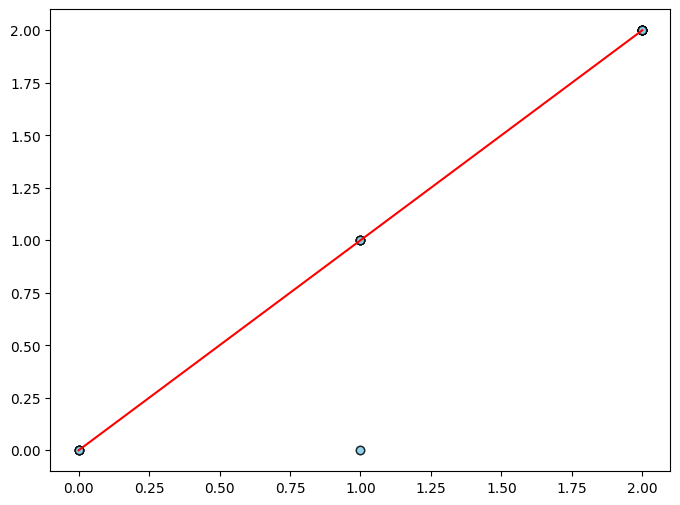

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-') 

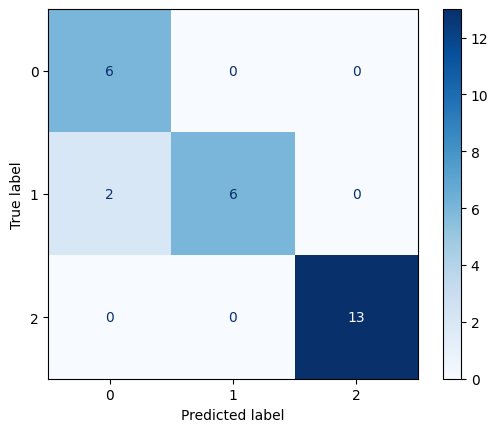

In [58]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues',values_format='d')

 